In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

In [2]:
df = pd.read_csv("../data/classification/classification-train.csv")

In [3]:
df.head()

,Site,Timestamp_Local,Dry_Bulb_Temperature_C,Global_Horizontal_Radiation_W/m2,Building_Power_kW,Demand_Response_Flag,Demand_Response_Capacity_kW
0,siteA,2019-01-01 00:00:00,22.20,0.0,4.8,0,0.0
1,siteA,2019-01-01 00:15:00,22.27,0.0,4.8,0,0.0
2,siteA,2019-01-01 00:30:00,22.35,0.0,4.8,0,0.0
3,siteA,2019-01-01 00:45:00,22.42,0.0,4.8,0,0.0
4,siteA,2019-01-01 01:00:00,22.50,0.0,4.8,0,0.0


In [4]:
# Convert timestamp to datetime
df['Timestamp_Local'] = pd.to_datetime(df['Timestamp_Local'])

In [68]:
# Timestamp zu datetime konvertieren
df['Timestamp_Local'] = pd.to_datetime(df['Timestamp_Local'])
df['date'] = df['Timestamp_Local'].dt.date
df['year'] = df['Timestamp_Local'].dt.year
df['month'] = df['Timestamp_Local'].dt.month
df['day'] = df['Timestamp_Local'].dt.day

In [40]:
df[(df['Timestamp_Local'] >= '2019-01-06 00:00:00') & (df['Timestamp_Local'] < '2019-01-07 00:00:00')]

,Site,Timestamp_Local,Dry_Bulb_Temperature_C,Global_Horizontal_Radiation_W/m2,Building_Power_kW,Demand_Response_Flag,Demand_Response_Capacity_kW,hour,day_of_week,month,day_of_year
480,siteA,2019-01-06 00:00:00,19.89,0.0,4.8,0,0.0,0,6,1,6
481,siteA,2019-01-06 00:15:00,19.87,0.0,4.8,0,0.0,0,6,1,6
482,siteA,2019-01-06 00:30:00,19.85,0.0,4.8,0,0.0,0,6,1,6
483,siteA,2019-01-06 00:45:00,19.82,0.0,4.8,0,0.0,0,6,1,6
484,siteA,2019-01-06 01:00:00,19.80,0.0,4.8,0,0.0,1,6,1,6
...,...,...,...,...,...,...,...,...,...,...,...
35611,siteB,2019-01-06 22:45:00,18.02,0.0,4.8,0,0.0,22,6,1,6
35612,siteB,2019-01-06 23:00:00,18.00,0.0,4.8,0,0.0,23,6,1,6
35613,siteB,2019-01-06 23:15:00,17.97,0.0,4.8,0,0.0,23,6,1,6
35614,siteB,2019-01-06 23:30:00,17.95,0.0,4.8,0,0.0,23,6,1,6


In [62]:
# Example 1: DR Flag = 1
# sample_df = df[(df['Timestamp_Local'] >= '2019-01-09 00:00:00') & (df['Timestamp_Local'] < '2019-01-12 00:00:00')]


sample_df = df[(df['Timestamp_Local'] >= '2019-01-17 00:00:00') & (df['Timestamp_Local'] < '2019-01-20 00:00:00')]

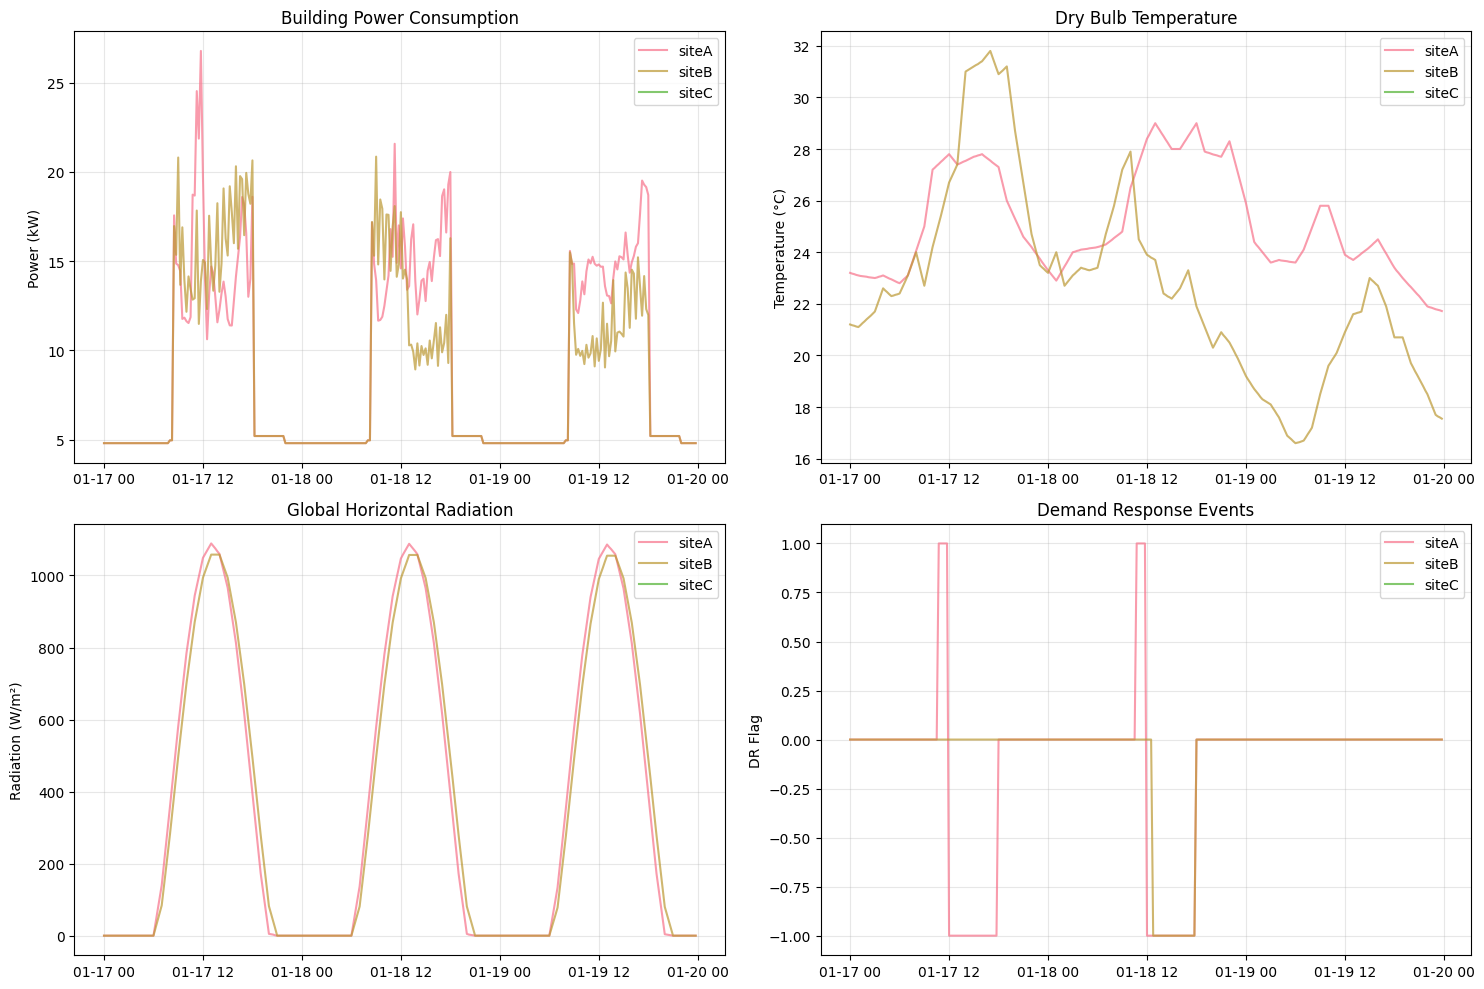

In [63]:
# Plot time series for each variable
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for site in df['Site'].unique():
    site_data = sample_df[sample_df['Site'] == site].sort_values('Timestamp_Local')
    
    axes[0,0].plot(site_data['Timestamp_Local'], site_data['Building_Power_kW'], 
                   label=site, alpha=0.7)
    axes[0,1].plot(site_data['Timestamp_Local'], site_data['Dry_Bulb_Temperature_C'], 
                   label=site, alpha=0.7)
    axes[1,0].plot(site_data['Timestamp_Local'], site_data['Global_Horizontal_Radiation_W/m2'], 
                   label=site, alpha=0.7)
    axes[1,1].plot(site_data['Timestamp_Local'], site_data['Demand_Response_Flag'], 
                   label=site, alpha=0.7)

# DR events - NOW FILTERED TO FIRST 24 HOURS
# dr_events_sample = sample_df[sample_df['Demand_Response_Flag'] != 0]  # Filter from sample_df instead of full df
# for site in df['Site'].unique():
#     site_dr = dr_events_sample[dr_events_sample['Site'] == site]
#     axes[1,1].scatter(site_dr['Timestamp_Local'], site_dr['Demand_Response_Flag'], 
#                      label=f'{site}', alpha=0.6, s=10)

axes[0,0].set_title('Building Power Consumption')
axes[0,0].set_ylabel('Power (kW)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

axes[0,1].set_title('Dry Bulb Temperature')
axes[0,1].set_ylabel('Temperature (°C)')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

axes[1,0].set_title('Global Horizontal Radiation')
axes[1,0].set_ylabel('Radiation (W/m²)')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

axes[1,1].set_title('Demand Response Events')
axes[1,1].set_ylabel('DR Flag')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [66]:
# Nach Site und Datum gruppieren und Tagesmittel berechnen
daily_avg = df.groupby(['Site', 'date']).agg({
    'Building_Power_kW': 'mean'
}).reset_index()

# Gesamtdurchschnitt pro Gebäude über alle Tage
building_averages = daily_avg.groupby('Site').agg({
    'Building_Power_kW': ['mean', 'std', 'min', 'max', 'count']
}).round(2)

In [70]:
daily_avg.head()

,Site,date,Building_Power_kW
0,siteA,2019-01-01,11.246354
1,siteA,2019-01-02,10.039687
2,siteA,2019-01-03,9.460000
3,siteA,2019-01-04,9.345937
4,siteA,2019-01-05,10.304375
